In [1]:
import pandas as pd
import sys
import os
sys.path.append("../code/")

from model import TemporalHypergraphModel
from model import run_from_df_and_save_edgelists, read_edgelists_from_df
from model_analysis import group_size_dist, get_transition_matrix

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Model parameters
pars_dict={
    "N":300,
    "t_max":1000,
    "beta":0.8,
    "epsilon":10,
    "alpha":0.25,
    "n0":10,
    "L":1,
    "verbose":False,
    "verbose_light":False
    }

In [3]:
Model = TemporalHypergraphModel()
Model.set_parameters(pars_dict)
Model.reset()

Hs = Model.run()

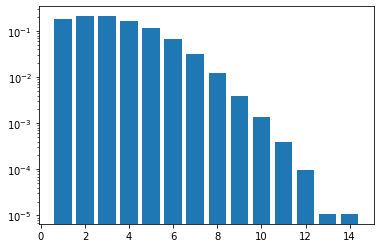

In [7]:
ks, Ps = group_size_dist(Hs)
plt.bar(ks, Ps)
plt.yscale("log")

### How to run and save the model from a dataframe of parameters

In [3]:
pars_df = pd.DataFrame.from_dict({k:[v] for k, v in pars_dict.items()})
pars_df

,N,t_max,beta,epsilon,alpha,n0,L,verbose,verbose_light
0,300,1000,0.8,10,0.25,10,1,False,False


In [ ]:
#Directory for results
OUT_DIR = "results/"
if not os.path.exists(OUT_DIR):
    os.makedirs(OUT_DIR)
    
#Index of the selected simulation from the pars_df
run_id = 0

#Running and saving edgelists
run_from_df_and_save_edgelists(run_id, pars_df, OUT_DIR)

In [5]:
#Reading
OUT_DIR = "results/"
run_id = 0
Hs = read_edgelists_from_df(run_id, pars_df, OUT_DIR)

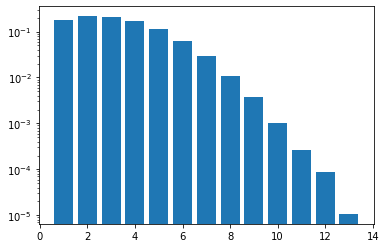

In [6]:
ks, Ps = group_size_dist(Hs)
plt.bar(ks, Ps)
plt.yscale("log")